# Demography for Z. tritici world-wide

First, let's set some important filenames and variables.

In [1]:
import dadi
import pylab
import pandas as pd

pop_nb = 2
rep=10
ns=[50]


dir_name = "/Users/feurtey/Documents/Postdoc_Bruce/Projects/WW_project/3_Sumstats_demography/"
vcf_name_nomaf = "Ztritici_global_March2020.filtered-clean.SNP.max-m-0.8.thin-1000bp"
ingroup_count = "".join([dir_name, vcf_name_nomaf, ".pass_noNA.high_anc_coef_snmf.pop", 
                         str(pop_nb), ".frq.count"])
outgroup_tab = "".join([dir_name, vcf_name_nomaf, ".pass_noNA.syn.for_dadi.tab"])

dadi_input_name = "".join([dir_name, "dadi_SNP_input_folded_WW.txt"])

outgroup = False




Here I prepare the input for dadi in a format that is specific to this software. It could include an outgroup to create an unfolded SFS if relevant. It will then by used by dadi to infer the SFS.

In [2]:
#Prepare the input for dadi
dict_outgroup = {}
with open(outgroup_tab, "r") as outgroup_input :
    for line in outgroup_input :
        sp = line.strip().split()
        pos = "_".join([sp[0], sp[1]])
        if outgroup :
            dict_outgroup[pos] = "\t".join(["-" + sp[2] + "-", "-" + sp[3] + "-"])
        else :
            dict_outgroup[pos] = "\t".join(["-" + sp[2] + "-", "---"])


out = open(dadi_input_name, "w")
out.write("\t".join(["Reference",  "Outgroup", "Allele1", "Cpar", "Allele2", "Cpar", "Position"]) + "\n")
with open(ingroup_count, "r") as outgroup_input :
    for i, line in enumerate(outgroup_input) :
        if i == 0 :
            pass
        else :
            sp = line.strip().split()
            pos = "_".join([sp[0], sp[1]])
            allele1 = sp[4].split(":")
            allele1_tw = "\t".join(allele1)
            allele2 = sp[5].split(":")
            allele2_tw = "\t".join(allele2)
            if int(allele1[1]) >= int(allele2[1]) : 
                to_write = "\t".join([dict_outgroup[pos],  allele1_tw, allele2_tw, pos])
            else :
                to_write = "\t".join([dict_outgroup[pos],  allele2_tw, allele1_tw, pos])
            shutup = out.write(to_write + "\n")

out.close()


In [3]:


dd = dadi.Misc.make_data_dict(dadi_input_name)
fs = dadi.Spectrum.from_data_dict(dd, pop_ids = ['Cpar'], projections = ns, polarized = False)


pts_l = [ns[0] + 20 , ns[0] + 40, ns[0] + 80]


Results = { "Model" : [],
            "Best-fit parameters" : [],
            "Likelihood" : [],
            "Theta" : [],
            "SFS" : []}

Let's start with plotting the SFS folded and projected to the number of samples indicated above as "ns".

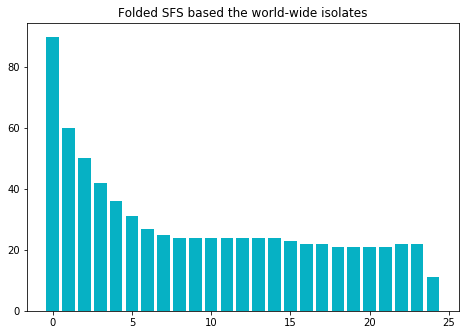

In [4]:
plot_fs = []
for x in fs :
    try : 
        plot_fs.append(int(x))
    except :
        pass

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(len(plot_fs)), plot_fs, color = "#06b1c4")
ax.set_title(" ".join(["Folded SFS based the population", str(pop_nb), "isolates"]))
plt.show()

## Model without change

0


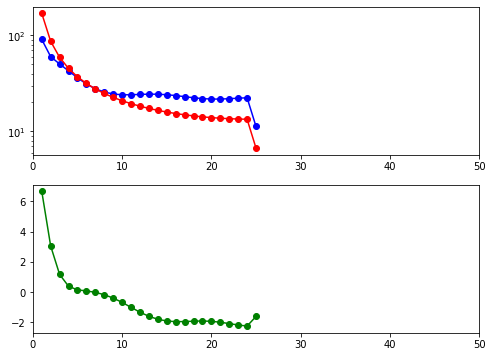

1
2
3
4
5
6
7
8
9


In [5]:
## Neutral
## ----------

for i in range(rep) :
    print(i)
    func = dadi.Demographics1D.two_epoch
    upper_bound = [1, 10]
    lower_bound = [1, 10]

    # This is our initial guess for the parameters, which is somewhat arbitrary.
    p0 = [1, 10]

    # Make the extrapolating version of our demographic model function.
    func_ex = dadi.Numerics.make_extrap_log_func(func)

    popt_nochange = dadi.Inference.optimize_log(p0, fs, func_ex, pts_l,
                                       lower_bound=lower_bound,
                                       upper_bound=upper_bound,
                                       verbose=len(p0), maxiter=100)

    # Calculate the best-fit model AFS.
    model_nochange = func_ex(popt_nochange, ns, pts_l)

    # Likelihood of the data given the model AFS.
    ll_model_nochange = dadi.Inference.ll_multinom(model_nochange, fs)
    # The optimal value of theta given the model.
    theta_nochange = dadi.Inference.optimal_sfs_scaling(model_nochange, fs)

    Results["Model"].append("Neutral")
    Results["Best-fit parameters"].append(";".join([str(x) for x in popt_nochange]))
    Results["Likelihood"].append(ll_model_nochange)
    Results["Theta"].append(theta_nochange)
    Results["SFS"].append(";".join([str(x) for x in model_nochange]))
    
    if i == 0 :
        pylab.figure(figsize=(8,6))
        dadi.Plotting.plot_1d_comp_multinom(model_nochange, fs, fig_num=1, 
                                            residual='Anscombe', plot_masked=False)

These plots are the plots produced by dadi and are meant to compare the observed SFS and the one produced by the model. In the top panel, the model is plotted in red and the data in blue. In the bottom panel, the residuals between model and data are plotted. Positive residuals indicate that too many SNPs were predicted for this entry.

Here, the model does not predict enough singletons as compared to the data. Instead, it predicts too many middle to high frequency alleles.


## Expansion model

0
Best-fit parameters: [ 20.92672669 408.14943232]
Maximum log composite likelihood: -117.99643382657216
Optimal value of theta: 7.963869791828809


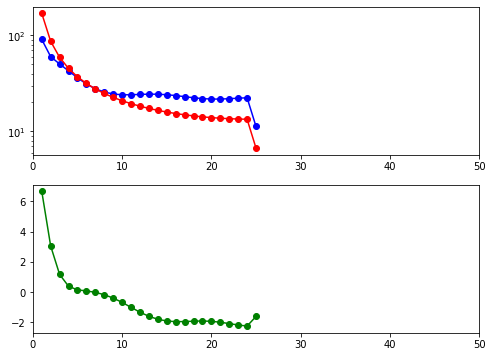

1
Best-fit parameters: [  8.71754824 168.53689898]
Maximum log composite likelihood: -117.99643387260562
Optimal value of theta: 19.11749977813476
2
Best-fit parameters: [ 22.07118337 437.12204847]
Maximum log composite likelihood: -117.99643371068822
Optimal value of theta: 7.550919389621905
3
Best-fit parameters: [ 11.7766913  231.97403414]
Maximum log composite likelihood: -117.99643373300333
Optimal value of theta: 14.151489776951415
4
Best-fit parameters: [ 297.5942135  5889.51949838]
Maximum log composite likelihood: -117.99643373050158
Optimal value of theta: 0.5600166901895814
5
Best-fit parameters: [ 19.26326586 386.59424511]
Maximum log composite likelihood: -117.99643363167067
Optimal value of theta: 8.65158211605387
6
Best-fit parameters: [ 40.13104842 793.32291054]
Maximum log composite likelihood: -117.99643373055031
Optimal value of theta: 4.152837591336046
7
Best-fit parameters: [ 10.71244855 214.5319629 ]
Maximum log composite likelihood: -117.99643363110667
Optimal va

In [6]:

## Expansion
## ----------


for i in range(rep) :
  print(i)
  func = dadi.Demographics1D.two_epoch
  upper_bound = [1000, 20000]
  lower_bound = [1, 0]
  
  # This is our initial guess for the parameters, which is somewhat arbitrary.
  p0 = [50, 100]
  
  # Make the extrapolating version of our demographic model function.
  func_ex = dadi.Numerics.make_extrap_log_func(func)
  
  # Perturb our parameters before optimization. This does so by taking each
  # parameter a up to a factor of two up or down.
  p0 = dadi.Misc.perturb_params(p0, fold=1, upper_bound=upper_bound,
                                lower_bound=lower_bound)
  
  popt_expansion = dadi.Inference.optimize_log(p0, fs, func_ex, pts_l,
                                               lower_bound=lower_bound,
                                               upper_bound=upper_bound,
                                               verbose=5000, maxiter=1000)
  
  
  # Calculate the best-fit model AFS.
  model_expansion = func_ex(popt_expansion, ns, pts_l)
  
  # Likelihood of the data given the model AFS.
  ll_model_expansion = dadi.Inference.ll_multinom(model_expansion, fs)
  # The optimal value of theta given the model.
  theta_expansion = dadi.Inference.optimal_sfs_scaling(model_expansion, fs)
  
  print('Best-fit parameters: {0}'.format(popt_expansion))
  print('Maximum log composite likelihood: {0}'.format(ll_model_expansion))
  print('Optimal value of theta: {0}'.format(theta_expansion))

  Results["Model"].append("Expansion")
  Results["Best-fit parameters"].append(";".join([str(x) for x in popt_expansion]))
  Results["Likelihood"].append(ll_model_expansion)
  Results["Theta"].append(theta_expansion)
  Results["SFS"].append(";".join([str(x) for x in model_expansion]))

  if i == 0 :
    pylab.figure(figsize=(8,6))
    dadi.Plotting.plot_1d_comp_multinom(model_expansion, fs, fig_num=None, 
                                        residual='Anscombe', plot_masked=False)

  


## Bottleneck model

Bottleneck
0
Best-fit parameters: [2.58241789e-02 8.12876960e+01]
Maximum log composite likelihood: -117.99643337705015
Optimal value of theta: 6453.553736542539


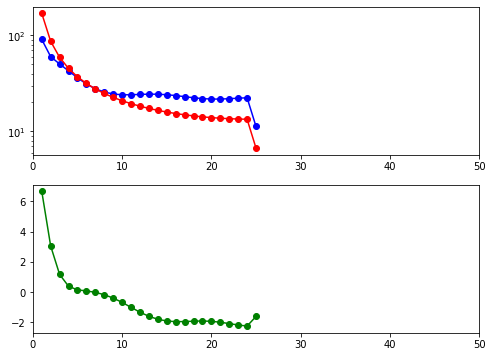

1
Best-fit parameters: [6.86038137e-02 8.97241422e+01]
Maximum log composite likelihood: -117.99643337704379
Optimal value of theta: 2429.277867384947
2
Best-fit parameters: [8.81032101e-02 1.62480884e+02]
Maximum log composite likelihood: -117.99643337707295
Optimal value of theta: 1891.61922606923
3
Best-fit parameters: [4.35587395e-02 5.93536709e+01]
Maximum log composite likelihood: -117.9964333770603
Optimal value of theta: 3826.045660465731
4
Best-fit parameters: [5.78976884e-02 8.83439682e+01]
Maximum log composite likelihood: -117.99643337705196
Optimal value of theta: 2878.4867003529403
5
Best-fit parameters: [2.56634491e-02 6.03279410e+01]
Maximum log composite likelihood: -117.99643337707136
Optimal value of theta: 6493.9722388618275
6
Best-fit parameters: [4.77636273e-02 7.24879254e+01]
Maximum log composite likelihood: -117.99643337706016
Optimal value of theta: 3489.218376736715
7
Best-fit parameters: [6.04898155e-02 1.60311478e+02]
Maximum log composite likelihood: -117.

In [7]:
## Bottleneck
## ----------

print ("Bottleneck")
for i in range(rep) :
    print(i)
    func = dadi.Demographics1D.two_epoch
    upper_bound = [1, 20000]
    lower_bound = [0.001, 0]

    # This is our initial guess for the parameters, which is somewhat arbitrary.
    p0 = [0.05, 100]

    # Make the extrapolating version of our demographic model function.
    func_ex = dadi.Numerics.make_extrap_log_func(func)

    # Perturb our parameters before optimization. This does so by taking each
    # parameter a up to a factor of two up or down.
    p0 = dadi.Misc.perturb_params(p0, fold=1, upper_bound=upper_bound,
                                  lower_bound=lower_bound)

   
    popt_bottleneck = dadi.Inference.optimize_log(p0, fs, func_ex, pts_l,
                                       lower_bound=lower_bound,
                                       upper_bound=upper_bound,
                                       verbose=5000, maxiter=100)
    # The verbose argument controls how often progress of the optimizer should be
    # printed. It's useful to keep track of optimization process.


    print('Best-fit parameters: {0}'.format(popt_bottleneck))


    # Calculate the best-fit model AFS.
    model_bottleneck = func_ex(popt_bottleneck, ns, pts_l)

    # Likelihood of the data given the model AFS.
    ll_model_bottleneck = dadi.Inference.ll_multinom(model_bottleneck, fs)
    print('Maximum log composite likelihood: {0}'.format(ll_model_bottleneck))

    # The optimal value of theta given the model.
    theta_bottleneck = dadi.Inference.optimal_sfs_scaling(model_bottleneck, fs)
    print('Optimal value of theta: {0}'.format(theta_bottleneck))

    Results["Model"].append("Bottleneck")
    Results["Best-fit parameters"].append(";".join([str(x) for x in popt_bottleneck]))
    Results["Likelihood"].append(ll_model_bottleneck)
    Results["Theta"].append(theta_bottleneck)
    Results["SFS"].append(";".join([str(x) for x in model_bottleneck]))

    if i == 0 :
      pylab.figure(figsize=(8,6))
      dadi.Plotting.plot_1d_comp_multinom(model_bottleneck, fs, fig_num=None, 
                                          residual='Anscombe', plot_masked=False)


In [8]:
pd.DataFrame.from_dict(Results)

,Model,Best-fit parameters,Likelihood,Theta,SFS
0,Neutral,1.0;10.000000000000002,-117.996433,166.657726,--;0.9991665068543744;0.4996672123902611;0.333...
1,Neutral,1.0;10.000000000000002,-117.996433,166.657726,--;0.9991665068543744;0.4996672123902611;0.333...
2,Neutral,1.0;10.000000000000002,-117.996433,166.657726,--;0.9991665068543744;0.4996672123902611;0.333...
3,Neutral,1.0;10.000000000000002,-117.996433,166.657726,--;0.9991665068543744;0.4996672123902611;0.333...
4,Neutral,1.0;10.000000000000002,-117.996433,166.657726,--;0.9991665068543744;0.4996672123902611;0.333...
5,Neutral,1.0;10.000000000000002,-117.996433,166.657726,--;0.9991665068543744;0.4996672123902611;0.333...
6,Neutral,1.0;10.000000000000002,-117.996433,166.657726,--;0.9991665068543744;0.4996672123902611;0.333...
7,Neutral,1.0;10.000000000000002,-117.996433,166.657726,--;0.9991665068543744;0.4996672123902611;0.333...
8,Neutral,1.0;10.000000000000002,-117.996433,166.657726,--;0.9991665068543744;0.4996672123902611;0.333...
9,Neutral,1.0;10.000000000000002,-117.996433,166.657726,--;0.9991665068543744;0.4996672123902611;0.333...
